In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

Simple Convolution layer

(1, 3, 3, 1)


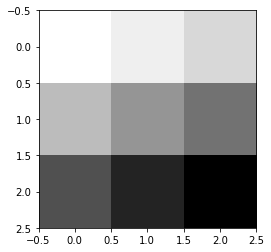

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='Greys')
plt.show()

- image : 1, 3, 3, 1
- Filter : 2, 2, 1, 1
- Stride : 1 X 1
- Padding: Valid
 

* image : 1개의 3 X 3 X 1의 이미지 (1,3,3,1) = (이미지갯수, 크기1,크기2, 색깔)
* Filter : 2 X 2 X 1 에 1개의 filter를 사용 (2,2,1,1) = (크기1, 크기2,, 색깔, 필터갯수)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[ 12.  16.]
 [ 24.  28.]]


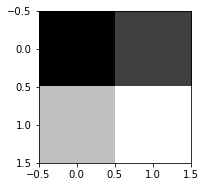

In [3]:
#print("imag \n", image)
print("image.shape", image.shape)
#Filter
weight = tf.constant([[[[1.0]], [[1.0]]],
                      [[[1.0]], [[1.0]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2, 2), cmap='gray')
    plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


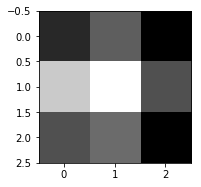

In [4]:
#print("imag \n", image)
print("image.shape", image.shape)
#Filter
weight = tf.constant([[[[1.0]], [[1.0]]],
                      [[[1.0]], [[1.0]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap='gray')
    plt.show()

### Filter 여러개

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


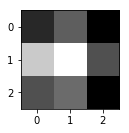

[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]


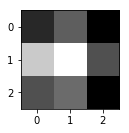

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


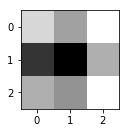

In [5]:
#print("imag \n", image)
print("image.shape", image.shape)
#Filter
weight = tf.constant([[[[1., 10., -1]], [[1., 10., -1]]],
                      [[[1., 10., -1]], [[1., 10., -1]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding = 'SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap='gray')
    plt.show()

# MAX Pooling

- Filter 된 이미지를 적당한 크기로 (아래에서는 2X2크기) 안에 있는 값중 가장 큰값으로 변환한다.

In [6]:
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1, 2, 2, 1], strides = [1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


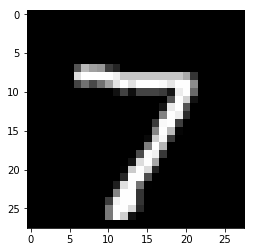

In [8]:

img = mnist.test.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

# MNIST Convolution layer

- Filter로 나오는 conv2d의 크기는 
- padding이 'valid'일떄는 (N- F)/strides + 1
- padding이 'SAME'일때는 N/stride

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


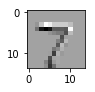

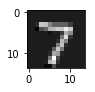

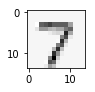

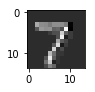

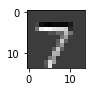

In [9]:
sess = tf.InteractiveSession()
img = mnist.test.images[0]
# 28 X 28의 1색깔 -1은 알아서 계산하라는 뜻
img = img.reshape(-1, 28, 28, 1)
# 3*3의 filter 5개 이용
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev = 0.01))

conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(14, 14), cmap='gray')
    plt.show()

# MNIST Max pooling

- conv2d 의 크기 14 * 14 
- ksize 2*2 
- strides 2
- 14/2 = 7  ---> 7*7 크기의 아웃풋

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


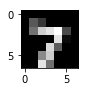

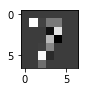

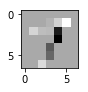

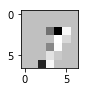

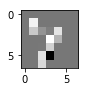

In [10]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(7, 7), cmap='gray')
    plt.show()

# MNIST

In [11]:
with tf.device('/cpu:0'): 
    X = tf.placeholder(tf.float32, [None, 784])
    X_img = tf.reshape(X, [-1, 28, 28, 1])
    Y = tf.placeholder(tf.float32, [None, 10])

    #L1 image shape = (?, 28, 28, 1)
    # filter 3*3 크리 1color 32개로 진행
    W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
    # conv -> (?, 28, 28, 32)
    # pool -> (?, 14, 14, 32)
    L1_conv2d = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding = 'SAME')
    L1 = tf.nn.relu(L1_conv2d)
    L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

    # L2 image shape = (?, 14, 14, 32)
    W2= tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
    # conv -> (?, 14, 14, 64)
    # pool -> (?, 7, 7, 64)

    L2_conv2d = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
    L2 = tf.nn.relu(L2_conv2d)
    L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    # 이것을 Fully connected  layer에 넣기 위해서 reshpae를 통해 펼친다
    L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
    # 그리고 L2를 (?, 3136)으로 reshape

    # final FC 7*7*64 inputs -> 10 output
    W3 = tf.get_variable('W33', shape = [7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
    b = tf.Variable(tf.random_normal([10]))
    logits = tf.matmul(L2_flat, W3) + b

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)

predicted = tf.argmax(logits, 1)
is_correct = tf.equal(predicted, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype = tf.float32))

training_epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("Learning Started, It takes times")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('epoch : {}, cost ={:.9f}'.format(epoch + 1, avg_cost))
    
print("Learning Finished")

print("Accuracy : ", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    

Learning Started, It takes times
epoch : 1, cost =0.342137100
epoch : 2, cost =0.095856836
epoch : 3, cost =0.071486434
epoch : 4, cost =0.057532689
epoch : 5, cost =0.047393669
epoch : 6, cost =0.041812521
epoch : 7, cost =0.037036472
epoch : 8, cost =0.032823658
epoch : 9, cost =0.028537874
epoch : 10, cost =0.026011675
epoch : 11, cost =0.022673690
epoch : 12, cost =0.020314892
epoch : 13, cost =0.017713544
epoch : 14, cost =0.015648145
epoch : 15, cost =0.014500018
Learning Finished
Accuracy :  0.9868


# DEEP CONV in MNIST

In [12]:
with tf.device('/cpu:0'): 
    X = tf.placeholder(tf.float32, shape = [None, 784])
    X_img = tf.reshape(X, [-1, 28, 28, 1])
    Y = tf.placeholder(tf.float32, shape = [None, 10])
    #dropout
    keep_prob = tf.placeholder(tf.float32)
    #변수
    learning_rate = 0.001

    #첫번째 레이어 입력 그림 크기 [-1, 28, 28, 1]
    W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.01))

    L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

    #두번째 레어이 입력 그림 크기 [-1, 14, 14, 32]
    W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))

    L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize =[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

    #세번째 레이어 입력 그림 크기 [-1, 7, 7, 64]
    W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev = 0.01))

    L3 = tf.nn.conv2d(L2, W3, strides = [1, 1, 1, 1], padding = 'SAME')
    L3 = tf.nn.relu(L3)
    L3 = tf.nn.max_pool(L3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    L3 = tf.nn.dropout(L3, keep_prob = keep_prob)

    #펼치기
    L3_flat = tf.reshape(L3, [-1, 4 * 4 * 128])

    #네번째 레이어 여기서부터는 fully connected layer
    W4 = tf.get_variable('W44dfsdfg444', shape = [4 * 4 * 128, 625], initializer = tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([625]))
    L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
    L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

    #다섯번째 레이어 (output layer)
    W5 = tf.get_variable('W555dfsdfg55', shape = [625, 10], initializer = tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([10]))
    logits = tf.matmul(L4, W5) + b5

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 15
batch_size = 100
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob : 0.7}
        c, _= sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('epoch : {}, cost ={:.9f}'.format(epoch + 1, avg_cost))
    
print("Learning Finished")

print("Accuracy : ", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

epoch : 1, cost =0.431255509
epoch : 2, cost =0.090818670
epoch : 3, cost =0.071565363
epoch : 4, cost =0.057245149
epoch : 5, cost =0.050771849
epoch : 6, cost =0.046289354
epoch : 7, cost =0.041859801
epoch : 8, cost =0.038474826
epoch : 9, cost =0.035545327
epoch : 10, cost =0.032016681
epoch : 11, cost =0.030456406
epoch : 12, cost =0.030194372
epoch : 13, cost =0.027186118
epoch : 14, cost =0.027796941
epoch : 15, cost =0.024377909
Learning Finished
Accuracy :  0.9931


# 깔끔하게 클래스로 정리해보자

In [13]:
tf.reset_default_graph()  
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()
        
    def _build_net(self):
        with tf.device('/cpu:0'): 
            with tf.variable_scope(self.name):
                #input place holders
                self.X = tf.placeholder(tf.float32, [None, 784])
                # img 28X28X1 (black/white)
                X_img = tf.reshape(self.X, [-1, 28, 28, 1])
                self.Y = tf.placeholder(tf.float32, [None, 10])
                self.keep_prob = tf.placeholder(tf.float32)
                #L1 image shape = (-1, 28, 28 , 1)
                #filter 3X3, 32개
                W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
                L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
                L1 = tf.nn.relu(L1)
                L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
                L1 = tf.nn.dropout(L1, self.keep_prob)

                W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
                L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
                L2 = tf.nn.relu(L2)
                L2 = tf.nn.max_pool(L2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
                L2 = tf.nn.dropout(L2, self.keep_prob)
                L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

                W3 = tf.get_variable('W33322', shape = [7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
                b3 = tf.Variable(tf.random_normal([10]))
                self.hypothesis = tf.matmul(L2_flat, W3) + b3

                self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = self.hypothesis, labels = self.Y))
                self.optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(self.cost)

                is_correct = tf.equal(tf.argmax(self.hypothesis, 1), tf.argmax(self.Y, 1))
                self.accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

    def predict(self, x_test, keep_prop = 1.0):
        return self.sess.run(self.hypothesis, feed_dict = {self.X: x_test, self.keep_prob : keep_prop})
    
    def get_accuracy(self, x_test, y_test, keep_prop = 1.0):
        return self.sess.run(self.accuracy, feed_dict = {self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})
    
    def train(self, x_data, y_data, keep_prop = 0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict = {self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})
  
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print("Learning Started")
batch_size = 100
training_epochs = 15

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)


# Test model and check accuracy
    print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))
    avg_cost = c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))


Learning Started
Accuracy: 0.9595
Epoch: 0001 cost = 0.000192349
Accuracy: 0.9761
Epoch: 0002 cost = 0.000280948
Accuracy: 0.9809
Epoch: 0003 cost = 0.000293787
Accuracy: 0.9806
Epoch: 0004 cost = 0.000243855
Accuracy: 0.9842
Epoch: 0005 cost = 0.000079354
Accuracy: 0.9874
Epoch: 0006 cost = 0.000158577
Accuracy: 0.9871
Epoch: 0007 cost = 0.000350457
Accuracy: 0.9877
Epoch: 0008 cost = 0.000013213
Accuracy: 0.9878
Epoch: 0009 cost = 0.000069880
Accuracy: 0.9883
Epoch: 0010 cost = 0.000084370
Accuracy: 0.9886
Epoch: 0011 cost = 0.000035500
Accuracy: 0.9908
Epoch: 0012 cost = 0.000160306
Accuracy: 0.9903
Epoch: 0013 cost = 0.000007620
Accuracy: 0.9894
Epoch: 0014 cost = 0.000051515
Accuracy: 0.99
Epoch: 0015 cost = 0.000019179
Learning Finished!
Accuracy: 0.99


In [14]:
import tensorflow as tf
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.device('/cpu:0'): 
            with tf.variable_scope(self.name):
                # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
                # for testing
                self.keep_prob = tf.placeholder(tf.float32)

                # input place holders
                self.X = tf.placeholder(tf.float32, [None, 784])
                # img 28x28x1 (black/white)
                X_img = tf.reshape(self.X, [-1, 28, 28, 1])
                self.Y = tf.placeholder(tf.int32, [None, 10])

                # L1 ImgIn shape=(?, 28, 28, 1)
                W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
                #    Conv     -> (?, 28, 28, 32)
                #    Pool     -> (?, 14, 14, 32)
                L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
                L1 = tf.nn.relu(L1)
                L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                                    strides=[1, 2, 2, 1], padding='SAME')
                L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)
                '''
                Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
                Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
                Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
                Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
                '''

                # L2 ImgIn shape=(?, 14, 14, 32)
                W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
                #    Conv      ->(?, 14, 14, 64)
                #    Pool      ->(?, 7, 7, 64)
                L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
                L2 = tf.nn.relu(L2)
                L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                                    strides=[1, 2, 2, 1], padding='SAME')
                L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)
                '''
                Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
                Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
                Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
                Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
                '''

                # L3 ImgIn shape=(?, 7, 7, 64)
                W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
                #    Conv      ->(?, 7, 7, 128)
                #    Pool      ->(?, 4, 4, 128)
                #    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
                L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
                L3 = tf.nn.relu(L3)
                L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                                    1, 2, 2, 1], padding='SAME')
                L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)

                L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
                '''
                Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
                Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
                Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
                Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
                Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
                '''

                # L4 FC 4x4x128 inputs -> 625 outputs
                W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                                     initializer=tf.contrib.layers.xavier_initializer())
                b4 = tf.Variable(tf.random_normal([625]))
                L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
                L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)
                '''
                Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
                Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
                '''

                # L5 Final FC 625 inputs -> 10 outputs
                W5 = tf.get_variable("W5", shape=[625, 10],
                                     initializer=tf.contrib.layers.xavier_initializer())
                b5 = tf.Variable(tf.random_normal([10]))
                self.logits = tf.matmul(L4, W5) + b5
                '''
                Tensor("add_1:0", shape=(?, 10), dtype=float32)
                '''

            # define cost/loss & optimizer
            self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                logits=self.logits, labels=self.Y))
            self.optimizer = tf.train.AdamOptimizer(
                learning_rate=learning_rate).minimize(self.cost)

            correct_prediction = tf.equal(
                tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prop=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.keep_prob: keep_prop})

    def get_accuracy(self, x_test, y_test, keep_prop=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})

    def train(self, x_data, y_data, keep_prop=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})

# initialize
tf.reset_default_graph()
sess = tf.Session()
m1 = Model(sess, "m1")
sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning Started!
Epoch: 0001 cost = 0.378812422
Epoch: 0002 cost = 0.097571050
Epoch: 0003 cost = 0.072058503
Epoch: 0004 cost = 0.058064553
Epoch: 0005 cost = 0.052367773
Epoch: 0006 cost = 0.046213146
Epoch: 0007 cost = 0.041819994
Epoch: 0008 cost = 0.038066109
Epoch: 0009 cost = 0.035558408
Epoch: 0010 cost = 0.032015040
Epoch: 0011 cost = 0.032062165
Epoch: 0012 cost = 0.030267638
Epoch: 0013 cost = 0.027598319
Epoch: 0014 cost = 0.027131635
Epoch: 0015 cost = 0.025717429
Learning Finished!
Accuracy: 0.9922


# tf.layers 사용 하기

In [22]:
class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])
            #첫번째 레이어 입력 그림 크기 [-1, 28, 28, 1]
            #W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.35))

            #L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
            #L1 = tf.nn.relu(L1)
            #L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
            #L1 = tf.nn.dropout(L1, keep_prob)
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.7, training=self.training)

            #두번째 레어이 입력 그림 크기 [-1, 14, 14, 32]
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.7, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="same", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="same", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.7, training=self.training)
            #세번째 레이어 입력 그림 크기 [-1, 7, 7, 64]
            #W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev = 0.35))

            #L3 = tf.nn.conv2d(L2, W3, strides = [1, 1, 1, 1], padding = 'SAME')
            #L3 = tf.nn.relu(L3)
            #L3 = tf.nn.max_pool(L3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
            #L3 = tf.nn.dropout(L3, keep_prob)

            #펼치기
            #L3 = tf.reshape(L3, [-1, 4 * 4 * 128])
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.5, training=self.training)
            #네번째 레이어 여기서부터는 fully connected layer
            # = tf.get_variable('W444444444', shape = [4 * 4 * 128, 512], initializer = tf.contrib.layers.xavier_initializer())
            #b4 = tf.Variable(tf.random_normal([512]))
            #L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
            #L4 = tf.nn.dropout(L4, keep_prob)


                #다섯번째 레이어 (output layer)
            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

# initialize
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Learning Started!
Epoch: 0001 cost = 0.785548373
Epoch: 0002 cost = 0.288520149
Epoch: 0003 cost = 0.223680990
Epoch: 0004 cost = 0.199448597
Epoch: 0005 cost = 0.183421938
Epoch: 0006 cost = 0.169799375
Epoch: 0007 cost = 0.159838426
Epoch: 0008 cost = 0.155815215
Epoch: 0009 cost = 0.153099418
Epoch: 0010 cost = 0.147347535
Epoch: 0011 cost = 0.144086822
Epoch: 0012 cost = 0.140462462
Epoch: 0013 cost = 0.139439983
Epoch: 0014 cost = 0.137537991
Epoch: 0015 cost = 0.135450478
Learning Finished!
Accuracy: 0.9896


# EMSAMBLE 기법

In [24]:
models = []
num_models = 7
sess = tf.Session()
for m in range(num_models):
    models.append(Model(sess, "model" + str(m)))
sess.run(tf.global_variables_initializer())
print('Learning Started')

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch
    print('Epochs: {}, cost = {}'.format(epoch + 1, avg_cost_list))

Learning Started
Epochs: 1, cost = [ 0.78337299  0.7938922   0.77710948  0.73435991  0.77114539  0.778057
  0.79685929]
Epochs: 2, cost = [ 0.29119053  0.29428074  0.28761703  0.28196989  0.30176739  0.2945587
  0.29072685]
Epochs: 3, cost = [ 0.22999426  0.22924941  0.23091461  0.22841602  0.23539838  0.23160297
  0.23555018]
Epochs: 4, cost = [ 0.20149169  0.20306007  0.20052233  0.20126843  0.20691201  0.20280772
  0.20211805]
Epochs: 5, cost = [ 0.18448889  0.18335787  0.18101145  0.18478252  0.18989673  0.18422249
  0.18489431]
Epochs: 6, cost = [ 0.17294098  0.16864001  0.17132215  0.17117819  0.1761551   0.17386172
  0.17220481]
Epochs: 7, cost = [ 0.16380435  0.16255926  0.16318649  0.16175567  0.16777165  0.16798122
  0.1671454 ]
Epochs: 8, cost = [ 0.15577197  0.15601921  0.15479789  0.15488251  0.16068699  0.15975276
  0.15540151]
Epochs: 9, cost = [ 0.15144436  0.14955287  0.14808967  0.15225134  0.15004586  0.1549234
  0.15135788]
Epochs: 10, cost = [ 0.15071562  0.1454312

# emsamble prediction
- 다양한 기법 존재 
- 여기서는 결과들을 단순히 합하여 argmax로 점수가 가장 높은 것을 결과로 잡는다

In [28]:
test_size = len(mnist.test.labels)
predictions = np.zeros(test_size * 10).reshape(test_size, 10)

for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(mnist.test.images, mnist.test.labels))
    o = m.predict(mnist.test.images)
    predictions += o

emsemble_correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
emsemble_accuracy = tf.reduce_mean(tf.cast(emsemble_correct_prediction, tf.float32))
print("앙상블 정확도 : {}".format(sess.run(emsemble_accuracy)))


0 Accuracy: 0.9895
1 Accuracy: 0.9905
2 Accuracy: 0.9887
3 Accuracy: 0.9893
4 Accuracy: 0.9899
5 Accuracy: 0.9892
6 Accuracy: 0.9897
앙상블 정확도 : 0.9908999800682068
